In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
sns.set(style='darkgrid')
colors=['#FF6B6B', '#60D2CB']

In [2]:
train_df = pd.read_csv('data/train.csv', index_col=0)
test_df = pd.read_csv('data/test.csv', index_col=0)

In [3]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<h1>Описание признаков</h1>
<br><br>

| № | Feature | Description |
| :--- | :--- | :--- |
| 1 | `Gender` | Пол пассажира |
| 2 | `Customer Type` | Наличие у пассажира карты лояльности |
| 3 | `Age` | Возраст пассажира |
| 4 | `Type of Travel` |  Цель полета (личные поездки, деловые поездки) |
| 5 | `Class` |  Класс обслуживания пассажиров в самолете (Business, Eco, Eco Plus) |
| 6 | `Flight Distance` |  Расстояние полета |
| 7 | `Inflight wifi service` |  Уровень удовлетворенности услугой Wi-Fi во время полета (0 - неприменимо, 1-5) |
| 8 | `Departure/Arrival time convenient` |  Уровень удовлетворенности временем отправления/прибытия |
| 9 | `Ease of Online booking` |  Уровень удовлетворенности онлайн-бронированием |
| 10 | `Gate location` |  Уровень удовлетворенности местоположением выхода на посадку |
| 11 | `Food and drink` |  Уровень удовлетворенности едой и напитками |
| 12 | `Online boarding` | Уровень удовлетворенности онлайн регистрацией |
| 13 | `Seat comfort` | Уровень удовлетворенности комфортом сидений |
| 14 | `Inflight entertainment` | Уровень удовлетворенности развлечениями в полете |
| 15 | `On-board service` | Уровень удовлетворенности обслуживанием на борту |
| 16 | `Leg room service` | Уровень удовлетворенности расстоянием между креслами |
| 17 | `Baggage handling` | Уровень удовлетворенности сервисом транспортировки багажа |
| 18 | `Checkin service` | Уровень удовлетворенности сервисом регистрации на рейс |
| 19 | `Inflight service` | Уровень удовлетворенности обслуживанием в полете |
| 20 | `Cleanliness` | Уровень удовлетворенности чистотой |
| 21 | `Departure Delay in Minutes` | Задержка при вылете, мин. |
| 22 | `Arrival Delay in Minutes` | Задержка при прибытии, мин. |
| **23** | **`satisfaction`** | **Уровень удовлетворенности авиакомпанией, ***целевая переменная***** |


<h1>Разведывательный анализ данных (EDA)</h1>

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [8]:
train_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
train_df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [10]:
round(train_df['Arrival Delay in Minutes'].isna().sum() / len(train_df['Arrival Delay in Minutes']) * 100, 3)

0.298

In [11]:
print(train_df[train_df['satisfaction'] == 'satisfied'].shape[0] / train_df.shape[0])
print(train_df[train_df['satisfaction'] == 'neutral or dissatisfied'].shape[0] / train_df.shape[0])

0.43333269171542965
0.5666673082845703


In [12]:
train_df['sat_bin'] = train_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

C:\Users\darko\AppData\Local\Temp\ipykernel_14576\3881174996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


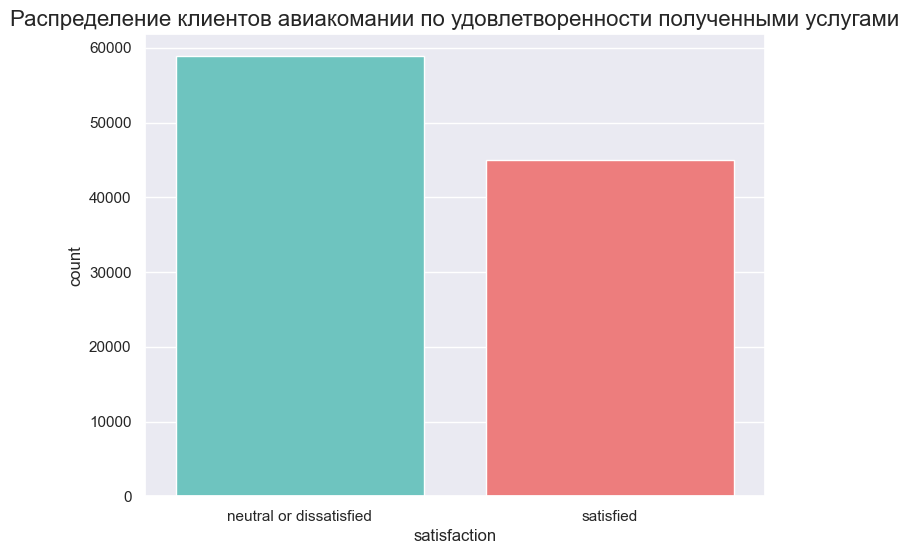

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=train_df, 
    x='satisfaction',
    palette=[colors[1], colors[0]]
)
plt.title('Распределение клиентов авиакомании по удовлетворенности полученными услугами', fontsize=16)
plt.show()

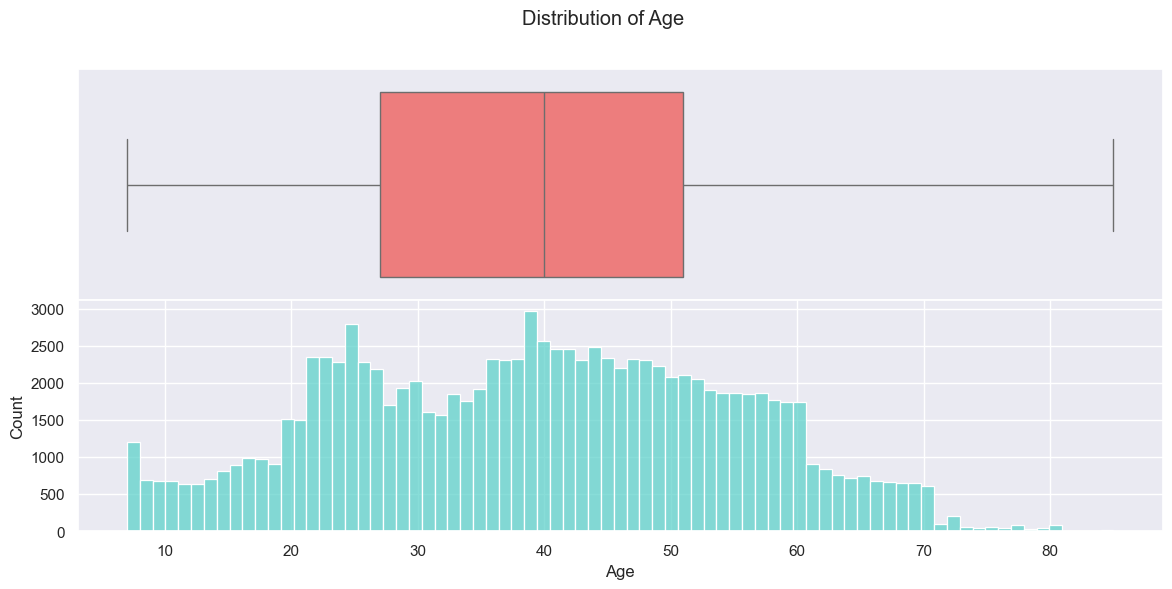

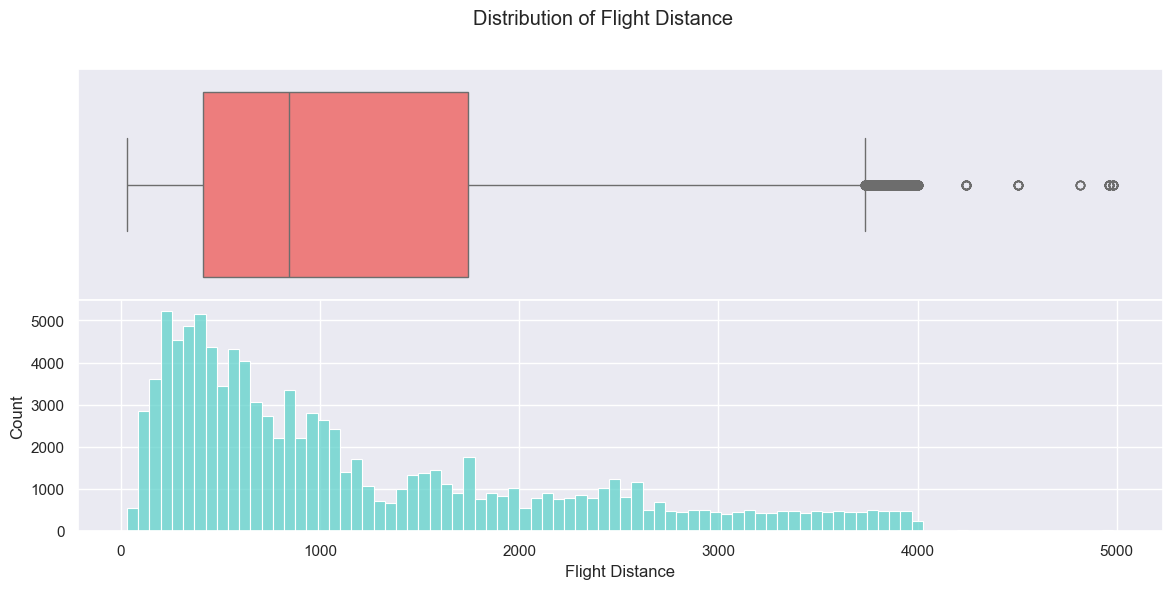

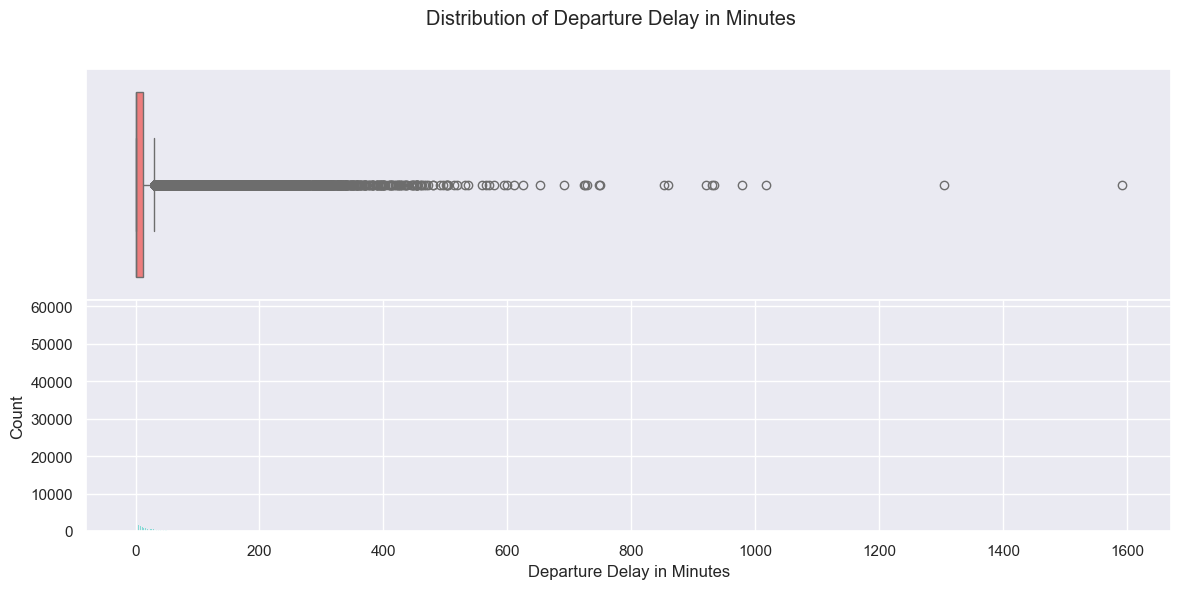

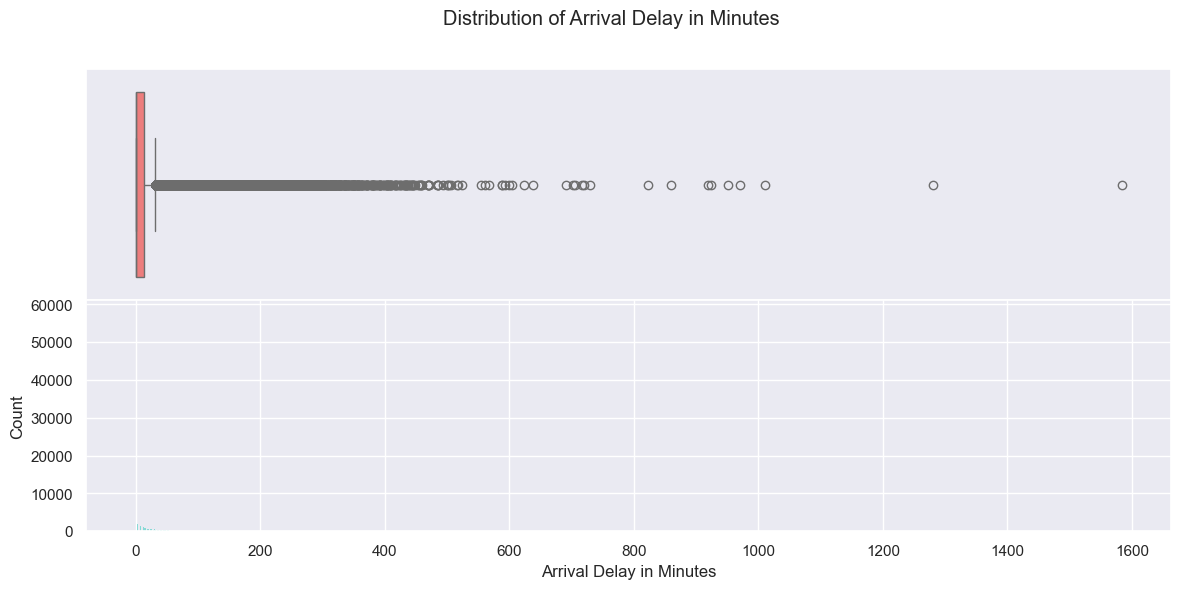

In [14]:
def DistributionPlot(df:pd.DataFrame, column:str, color:list):
    fig, axes = plt.subplots(nrows=2, figsize=(14,6))
    sns.boxplot(data=df, x=column, ax=axes[0], color=color[0])
    axes[0].set_xlabel(None)
    axes[0].get_xaxis().set_ticks([])
    sns.histplot(data=df, x=column, ax=axes[1], color=color[1])
    plt.subplots_adjust(hspace=0)
    plt.suptitle(f"Distribution of {column}")
    print()

cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in cols:
    DistributionPlot(train_df, col, colors)
    plt.show()

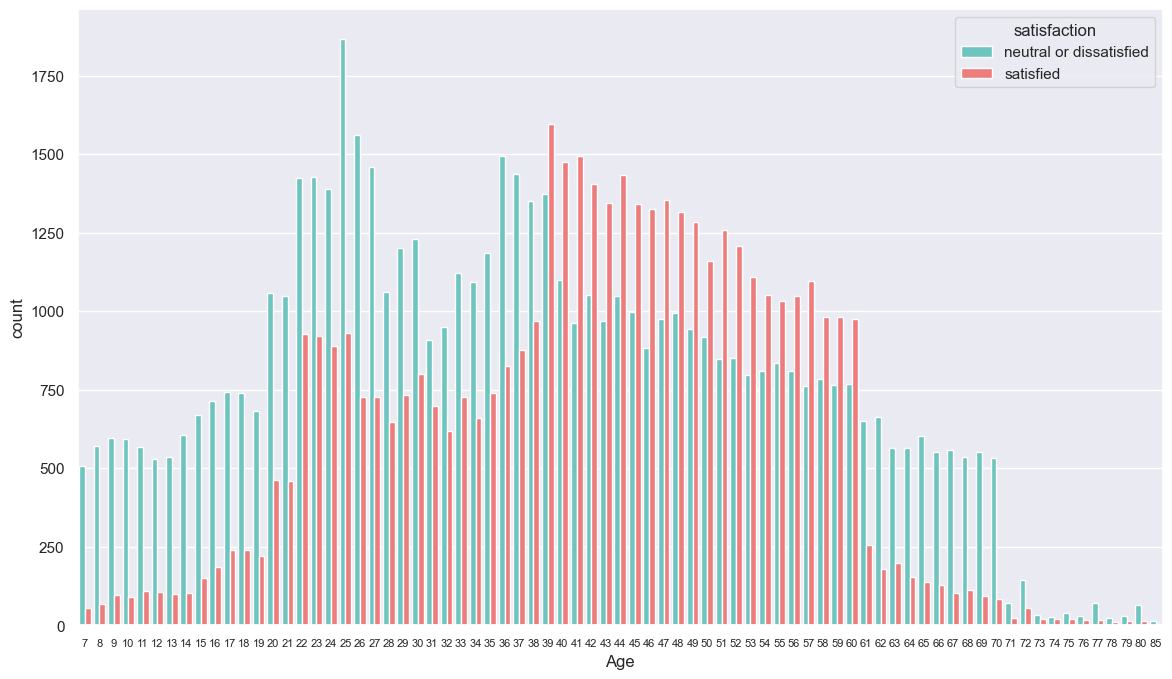

In [15]:
plt.figure(figsize=(14,8))
sns.countplot(
    data=train_df,
    x='Age',
    hue='satisfaction',
    palette=['#60D2CB', '#FF6B6B']
)
plt.xticks(fontsize=8)
plt.show()


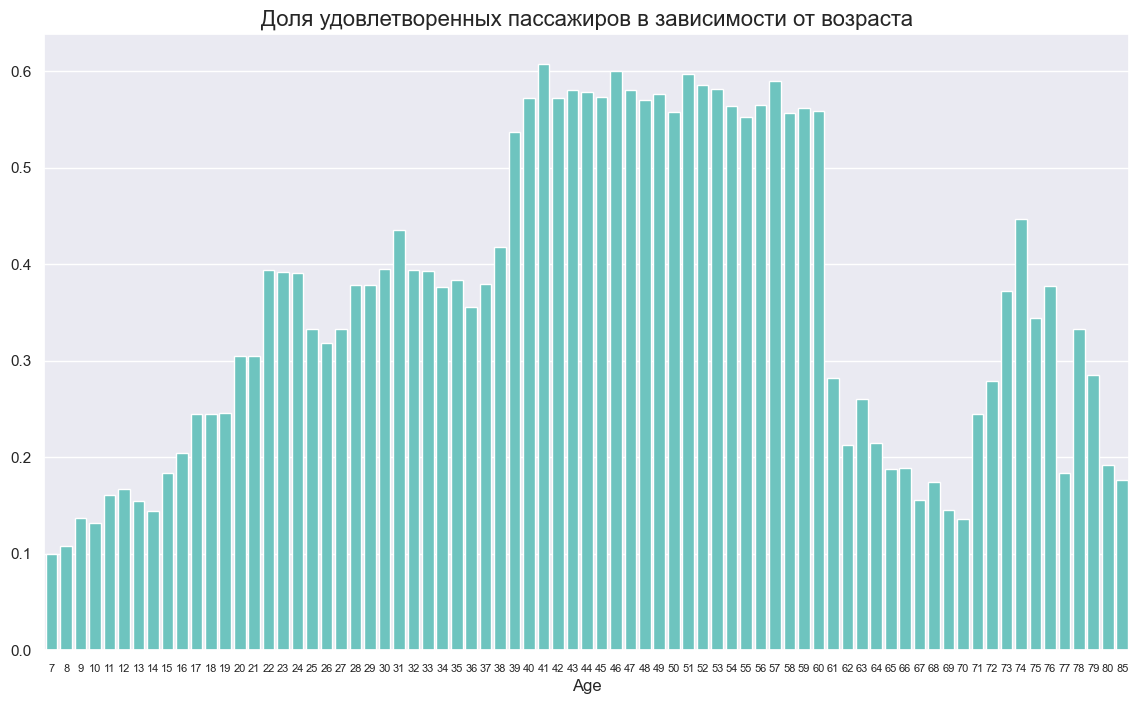

In [16]:
data = train_df.groupby(['Age'])['sat_bin'].mean()
plt.figure(figsize=(14,8))
sns.barplot(x=data.keys(), 
            y=data.values,
            color=colors[1]
)
plt.xticks(fontsize=8)
plt.title('Доля удовлетворенных пассажиров в зависимости от возраста', fontsize=16)
plt.show()

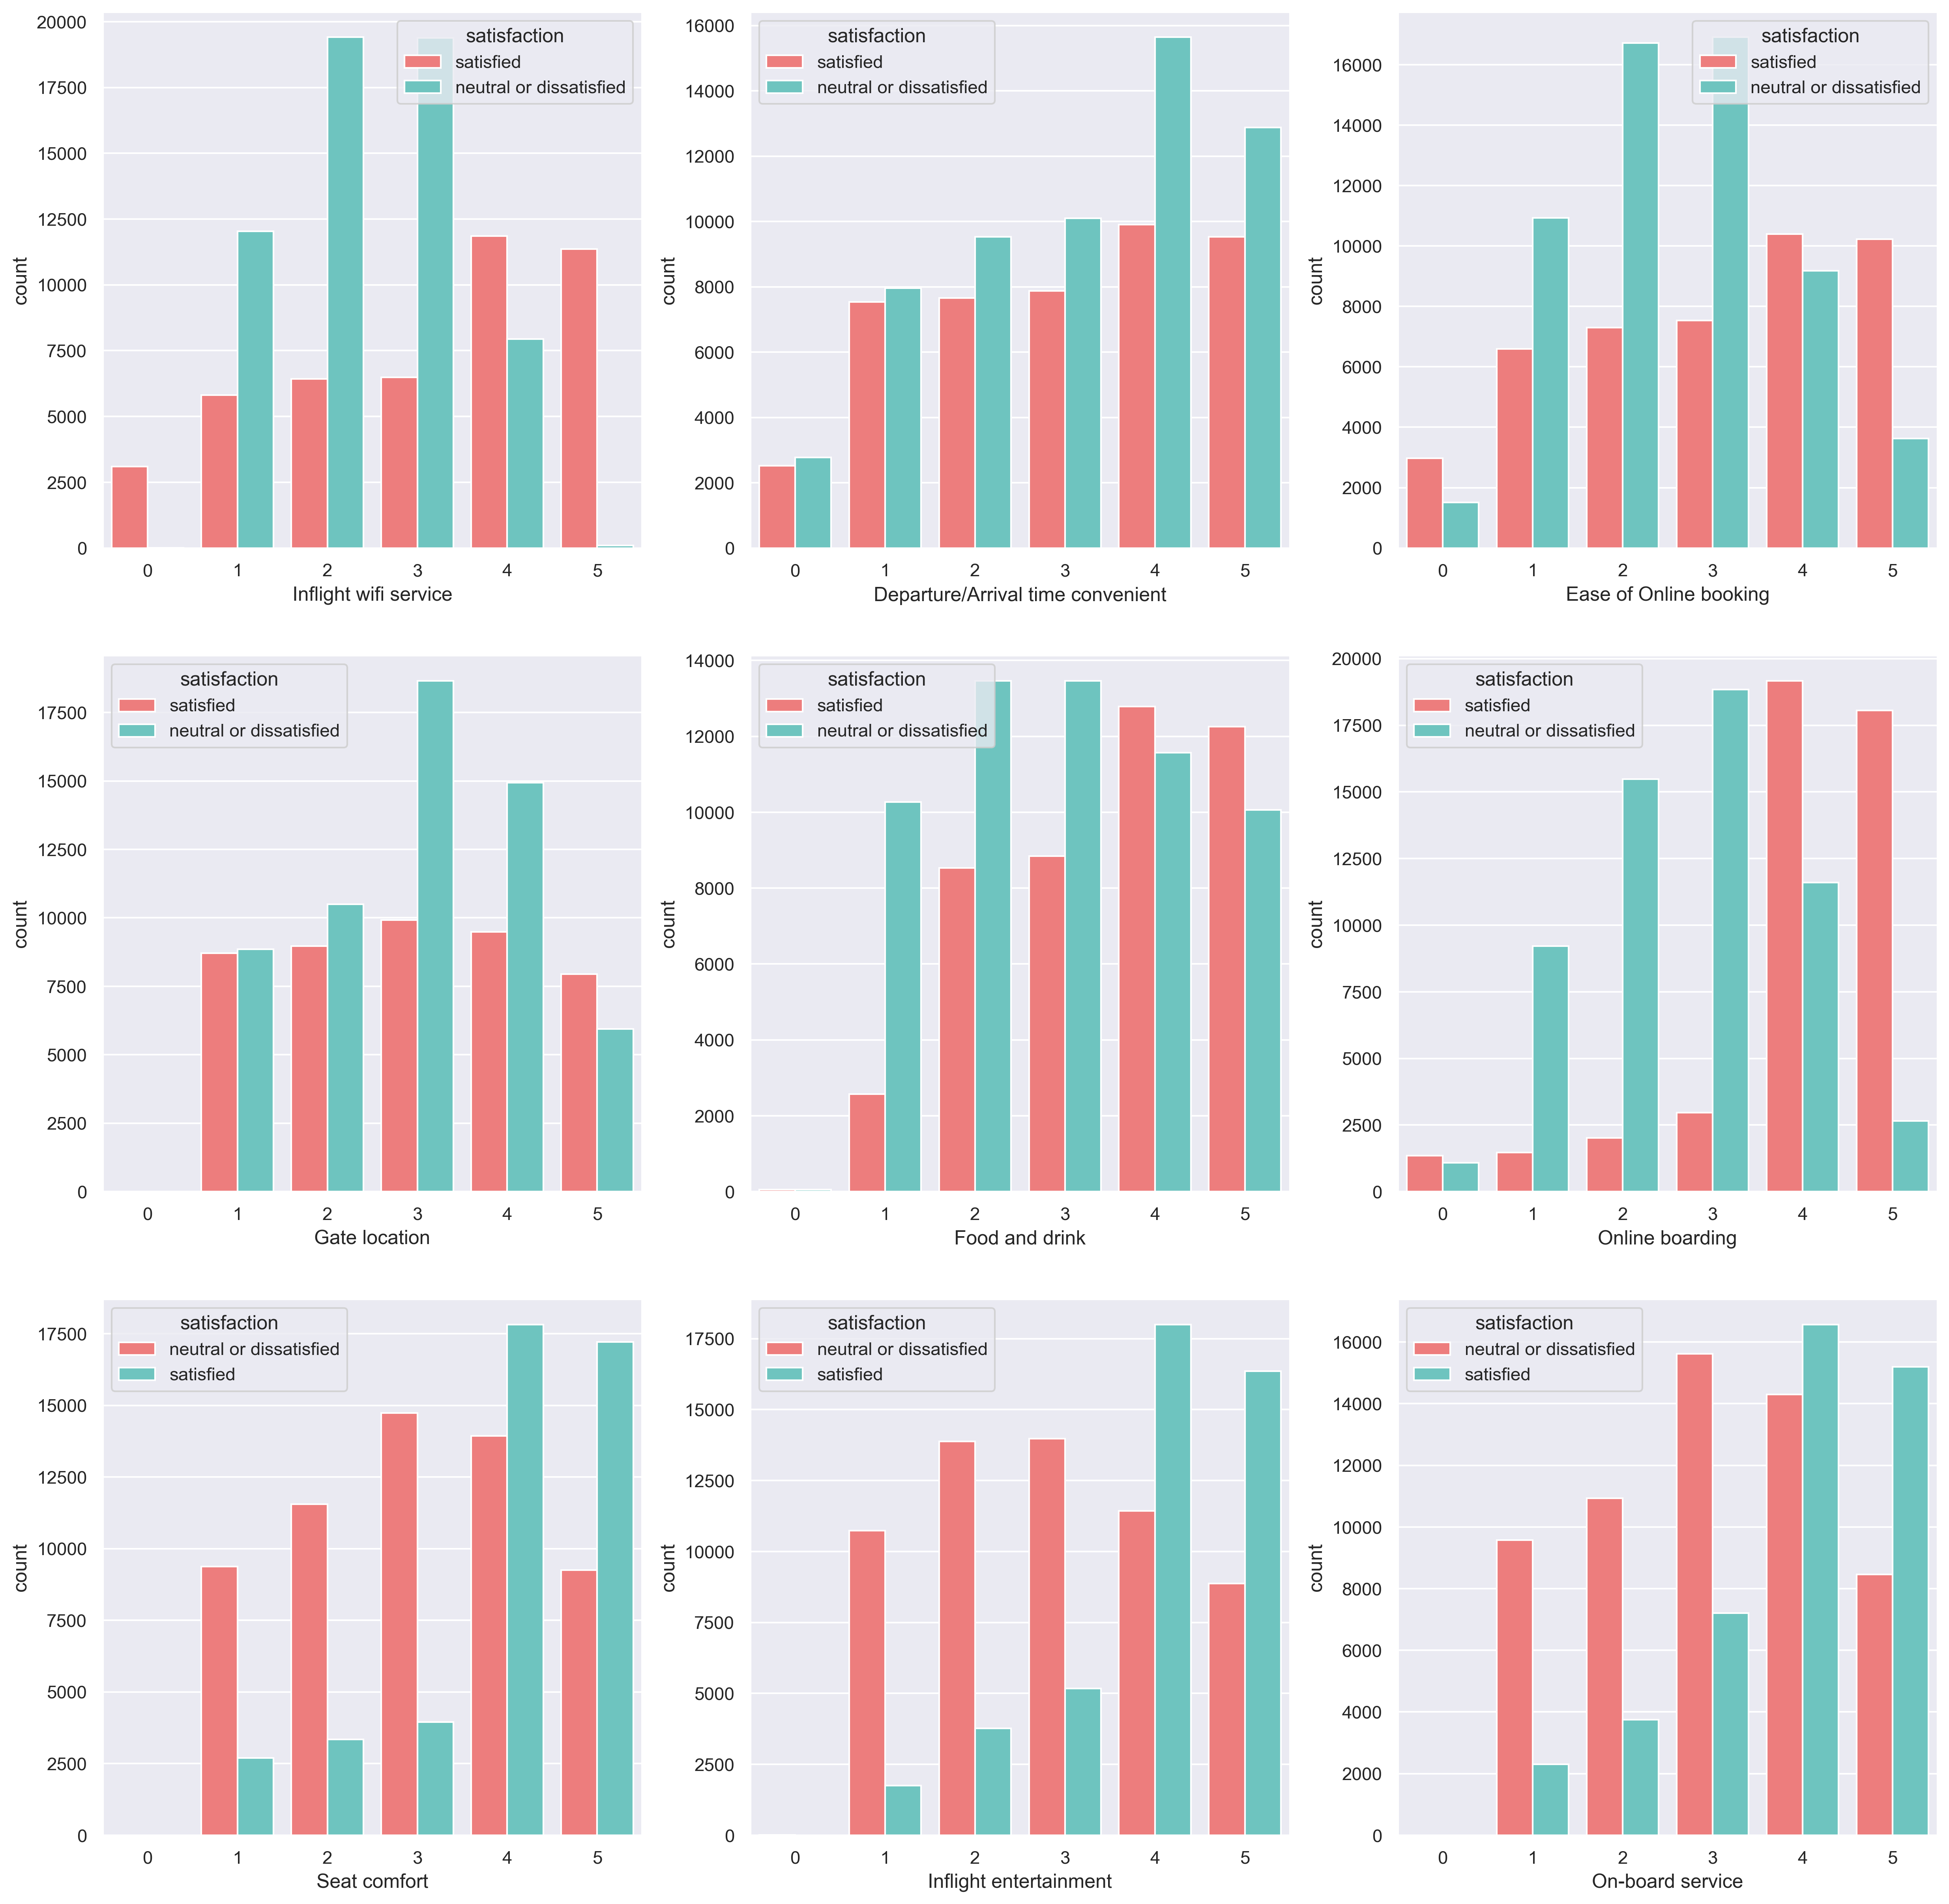

In [17]:
graphcols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', \
             'Gate location', 'Food and drink', 'Online boarding', \
             'Seat comfort', 'Inflight entertainment', 'On-board service']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), dpi=300)
i = 0
j = 0
for col in graphcols:
    sns.countplot(
        x=col,
        data=train_df,
        hue='satisfaction',
        ax=axes[i][j],
        palette=[colors[0], colors[1]]
    )
    j += 1
    if j == 3:
        j = 0
        i += 1

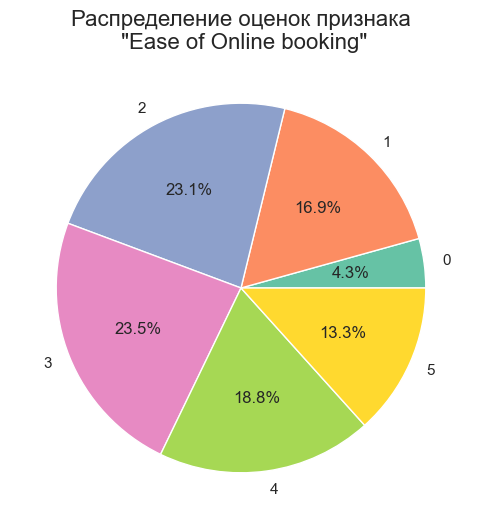

In [18]:
temp = train_df['Ease of Online booking'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(8, 6))
plt.pie(temp, labels=temp.keys().tolist(), autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Распределение оценок признака\n "Ease of Online booking"', fontsize=16)
plt.show()

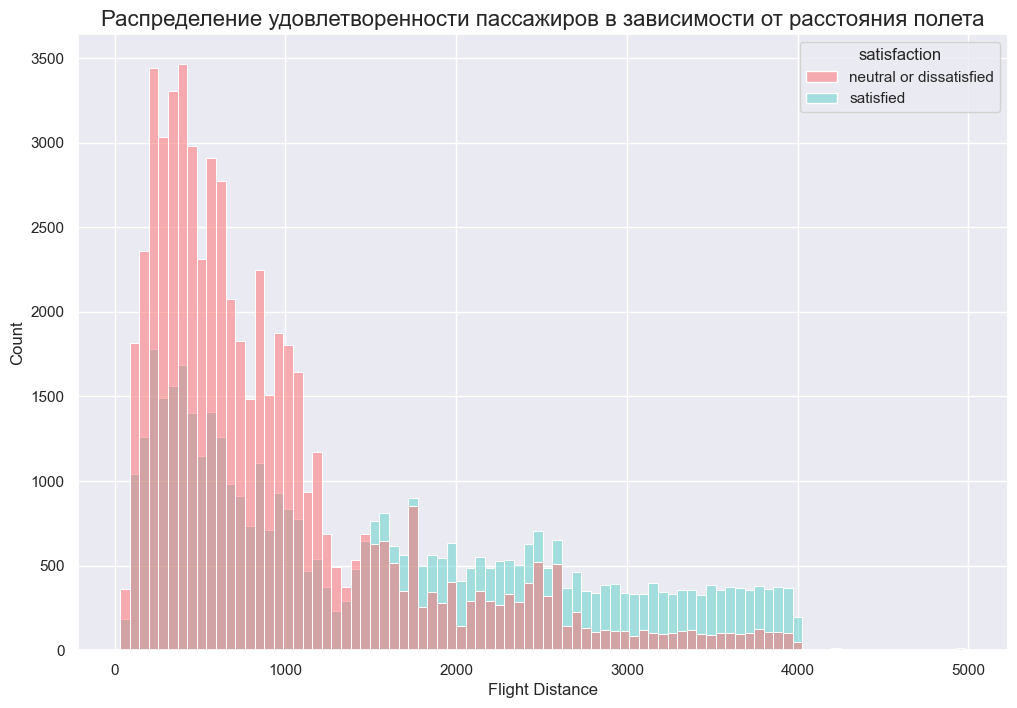

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(
    data=train_df,
    x='Flight Distance',
    palette=[colors[0], colors[1]],
    hue='satisfaction'
)
plt.title('Распределение удовлетворенности пассажиров в зависимости от расстояния полета', fontsize=16)
plt.show()

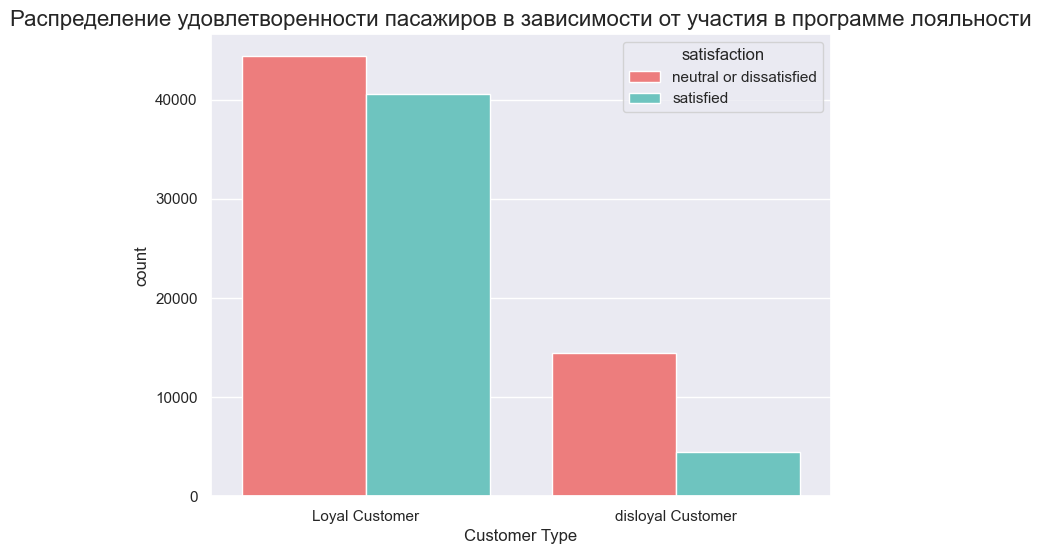

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=train_df,
    x='Customer Type',
    hue='satisfaction',
    palette=[colors[0], colors[1]]
)
plt.title('Распределение удовлетворенности пасажиров в зависимости от участия в программе лояльности', fontsize=16)
plt.show()


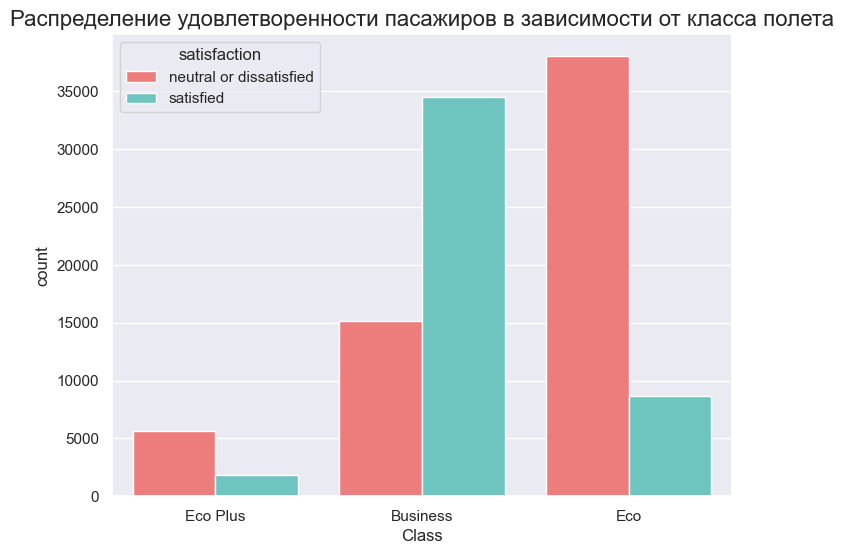

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=train_df,
    x='Class',
    hue='satisfaction',
    palette=[colors[0], colors[1]]
)
plt.title('Распределение удовлетворенности пасажиров в зависимости от класса полета', fontsize=16)
plt.show()

Какой класс выбирают пассажиры в зависимости от расстояния полета?

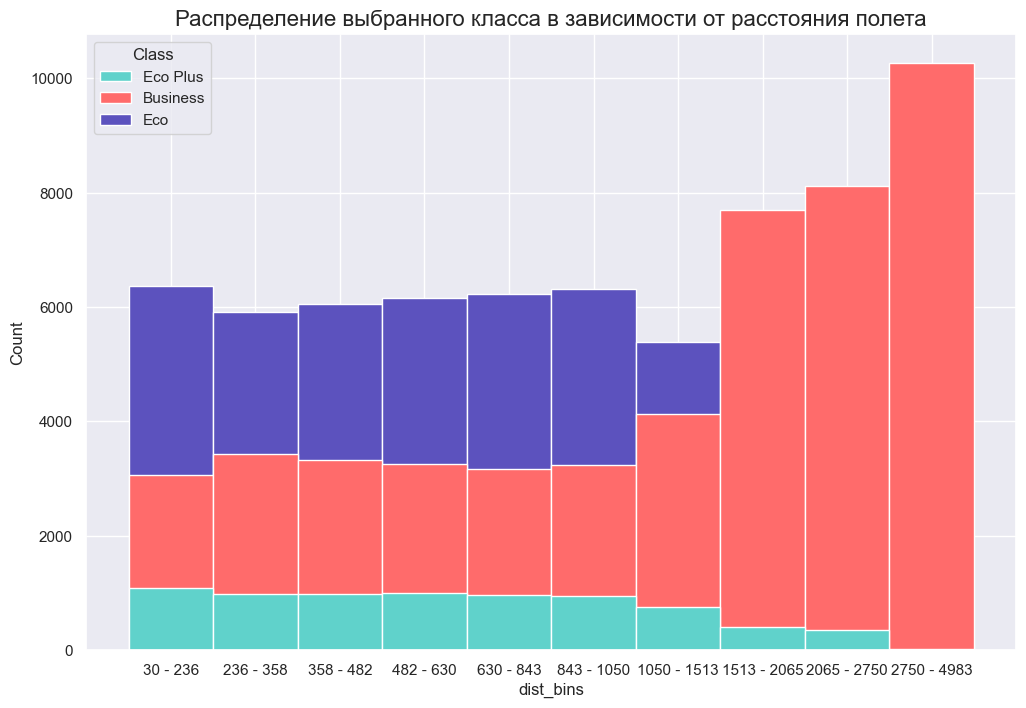

In [23]:
temp_df = train_df.copy(deep=True)
temp_df['dist_bins'] = pd.qcut(temp_df['Flight Distance'], q=10)
temp_df['dist_bins'] = temp_df['dist_bins'].apply(lambda x: f'{int(x.left)} - {int(x.right)}')
plt.figure(figsize=(12,8))
sns.histplot(data=temp_df,x='dist_bins',hue='Class', alpha=1,palette=['#60D2CB', '#FF6B6B', '#5C52BE'])
plt.title('Распределение выбранного класса в зависимости от расстояния полета', fontsize=16)
plt.show()
del temp_df



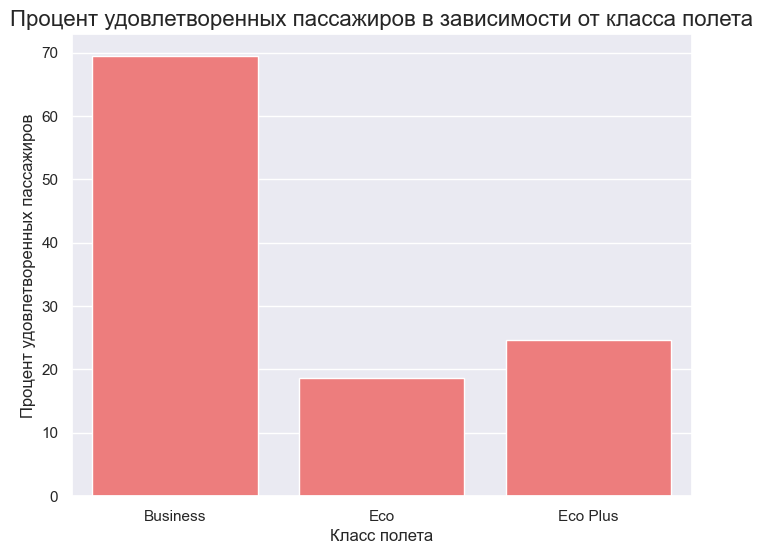

In [24]:
aggdf = train_df[['Class', 'sat_bin']].groupby(['Class']).agg('mean').reset_index()
aggdf['sat_bin'] = aggdf['sat_bin'] * 100
plt.figure(figsize=(8,6))
sns.barplot(data=aggdf, x='Class', y='sat_bin', color='#FF6B6B')
plt.title('Процент удовлетворенных пассажиров в зависимости от класса полета', fontsize=16)
plt.ylabel('Процент удовлетворенных пассажиров')
plt.xlabel('Класс полета')
plt.show()
del aggdf

<h2>Итог EDA</h2>
1. В обучающей выборке процент пассажиров, <b>удовлетворенных</b> услугами авиаперевозчика, составляет <b>43.33%</b>;<br>
2. В обучающей выборке процент пассажиров, <b>неудовлетворенных</b> услугами авиаперевозчика, составляет <b>56.67%</b>;<br>
3. Средний (медианный) возраст пассажиров составляет 40 лет;<br>
4. При путешествиях на дальние расстояния доля удовлетворенных пассажиров растет. Вероятно, это связано с тем, что при таких перелетах большинство клиентов выбирают более высокий класс;<br>
5. Процент удовлетворенных пассажиров при перелете бизнес-классом значительно превышает аналогичное значение для эконом и эконом-плюс классов;<br>
6. Пассажиры в возрасте от 39 до 60 лет в большей степени удовлетворены перелетом.
   


<h1>Кодирование признаков, подготовка данных</h1>

In [27]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,sat_bin
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1


Удаление столбца "id", поскольку он не должен оказывать влияния на результат.

In [29]:
train_df_preproc = train_df.drop(columns=['id'])
train_df_preproc.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,sat_bin
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1


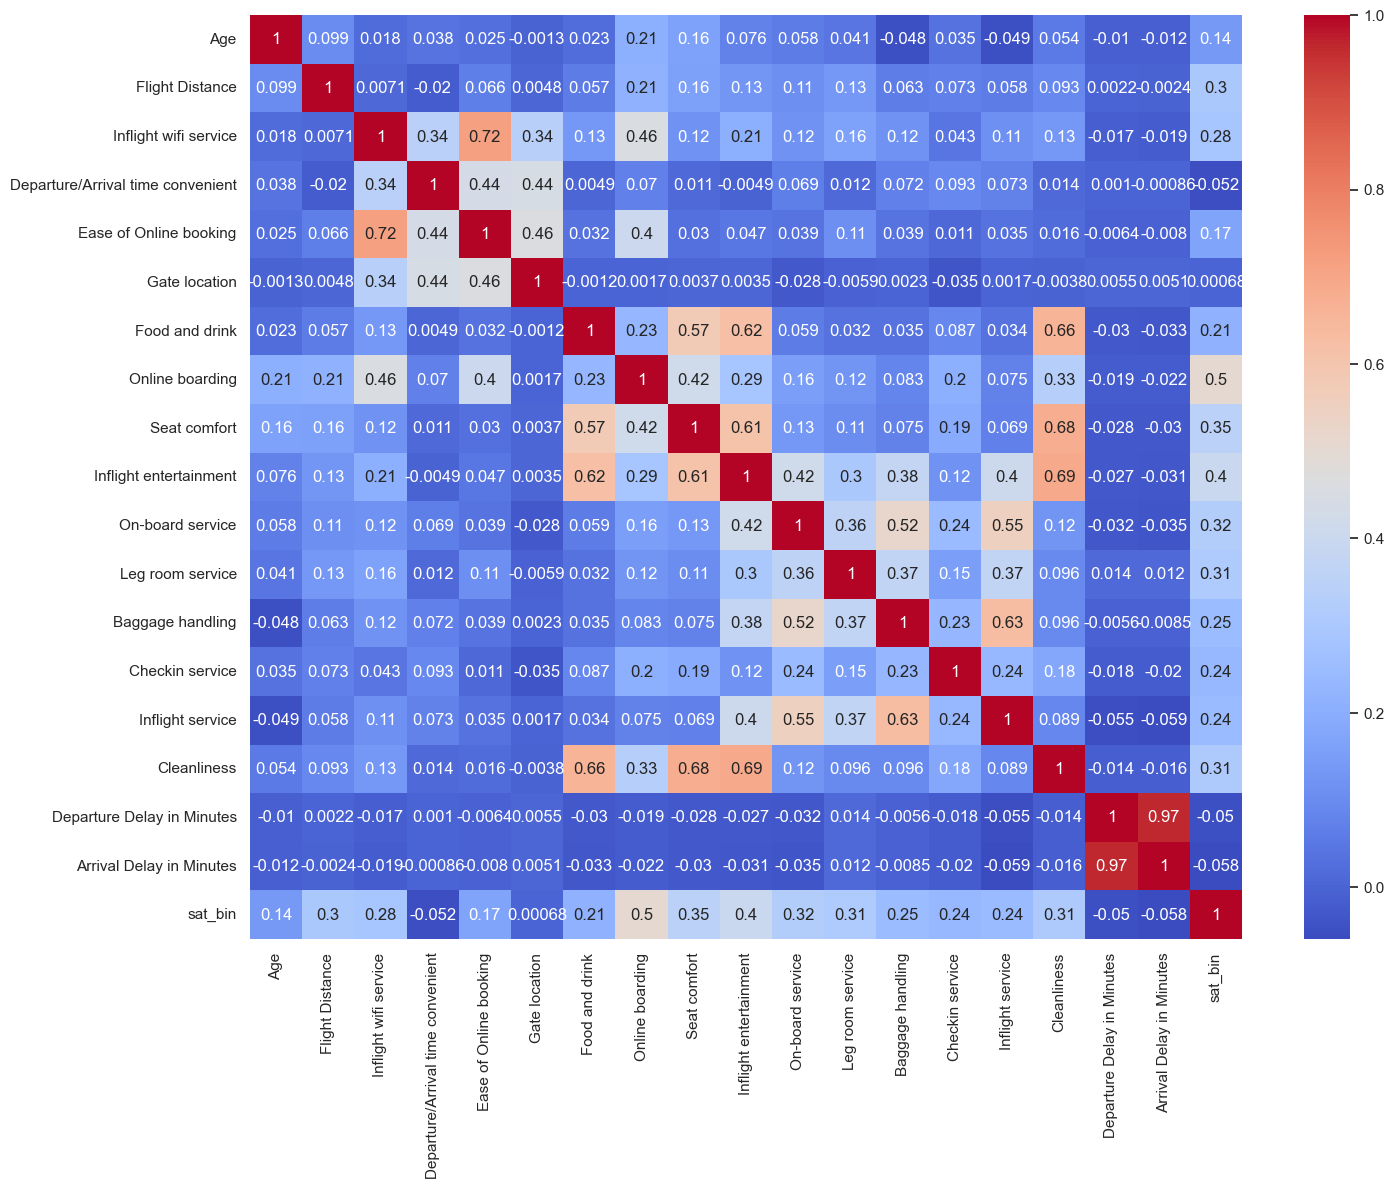

In [34]:
plt.figure(figsize=(16,12))
sns.heatmap(train_df_preproc.select_dtypes('number').corr(), annot=True,cmap='coolwarm')
plt.show()

Из таблицы корреляции видно, что наименьшее влияние на целевую переменную оказывают:
1. Departure/Arrival time convenient;
2. Gate location;
3. Departure Delay in Minutes 
4. Arrival Delay in Minutes

<b>Сразу удалим эти признаки.</b>

In [37]:
train_df_preproc = train_df_preproc.drop(columns=['Departure/Arrival time convenient',
                                 'Gate location',
                                 'Departure Delay in Minutes',
                                 'Arrival Delay in Minutes'])

In [38]:
train_df_preproc.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,sat_bin
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,1


In [39]:
train_df_preproc['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

Выполняем кодирование категориальных признаков. Для бинарных переводим в значения 0 и 1.
Признак 'Class' может быть закодирован порядковой переменной (0 - эконом, 1 - эконом-плюс, 2 - бизнес). В данном случае применим OneHotEncoding.

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
train_df_preproc['Gender'] = train_df_preproc['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
train_df_preproc['Customer Type'] = train_df_preproc['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
train_df_preproc['Type of Travel'] = train_df_preproc['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)


In [43]:
ohe = OneHotEncoder(sparse_output=False)
tr = ohe.fit_transform(train_df_preproc[['Class']])
cols = [f'is_{cat}' for cat in ohe.categories_[0]]
ClassDF = pd.DataFrame(tr, columns=cols)
train_df_preproc = train_df_preproc.join(ClassDF)

In [44]:
train_df_preproc.drop(columns=['Class', 'satisfaction'], inplace=True)

In [45]:
train_df_preproc

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,sat_bin,is_Business,is_Eco,is_Eco Plus
0,1,1,13,1,460,3,3,5,3,5,5,4,3,4,4,5,5,0,0.0,0.0,1.0
1,1,0,25,0,235,3,3,1,3,1,1,1,5,3,1,4,1,0,1.0,0.0,0.0
2,0,1,26,0,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1.0,0.0,0.0
3,0,1,25,0,562,2,5,2,2,2,2,2,5,3,1,4,2,0,1.0,0.0,0.0
4,1,1,61,0,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,23,0,192,2,2,2,2,2,2,3,1,4,2,3,2,0,0.0,1.0,0.0
103900,1,1,49,0,2347,4,4,2,4,5,5,5,5,5,5,5,4,1,1.0,0.0,0.0
103901,1,0,30,0,1995,1,1,4,1,5,4,3,2,4,5,5,4,0,1.0,0.0,0.0
103902,0,0,22,0,1000,1,1,1,1,1,1,4,5,1,5,4,1,0,0.0,1.0,0.0


In [46]:
train_df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  103904 non-null  int64  
 1   Customer Type           103904 non-null  int64  
 2   Age                     103904 non-null  int64  
 3   Type of Travel          103904 non-null  int64  
 4   Flight Distance         103904 non-null  int64  
 5   Inflight wifi service   103904 non-null  int64  
 6   Ease of Online booking  103904 non-null  int64  
 7   Food and drink          103904 non-null  int64  
 8   Online boarding         103904 non-null  int64  
 9   Seat comfort            103904 non-null  int64  
 10  Inflight entertainment  103904 non-null  int64  
 11  On-board service        103904 non-null  int64  
 12  Leg room service        103904 non-null  int64  
 13  Baggage handling        103904 non-null  int64  
 14  Checkin service         1

<Axes: >

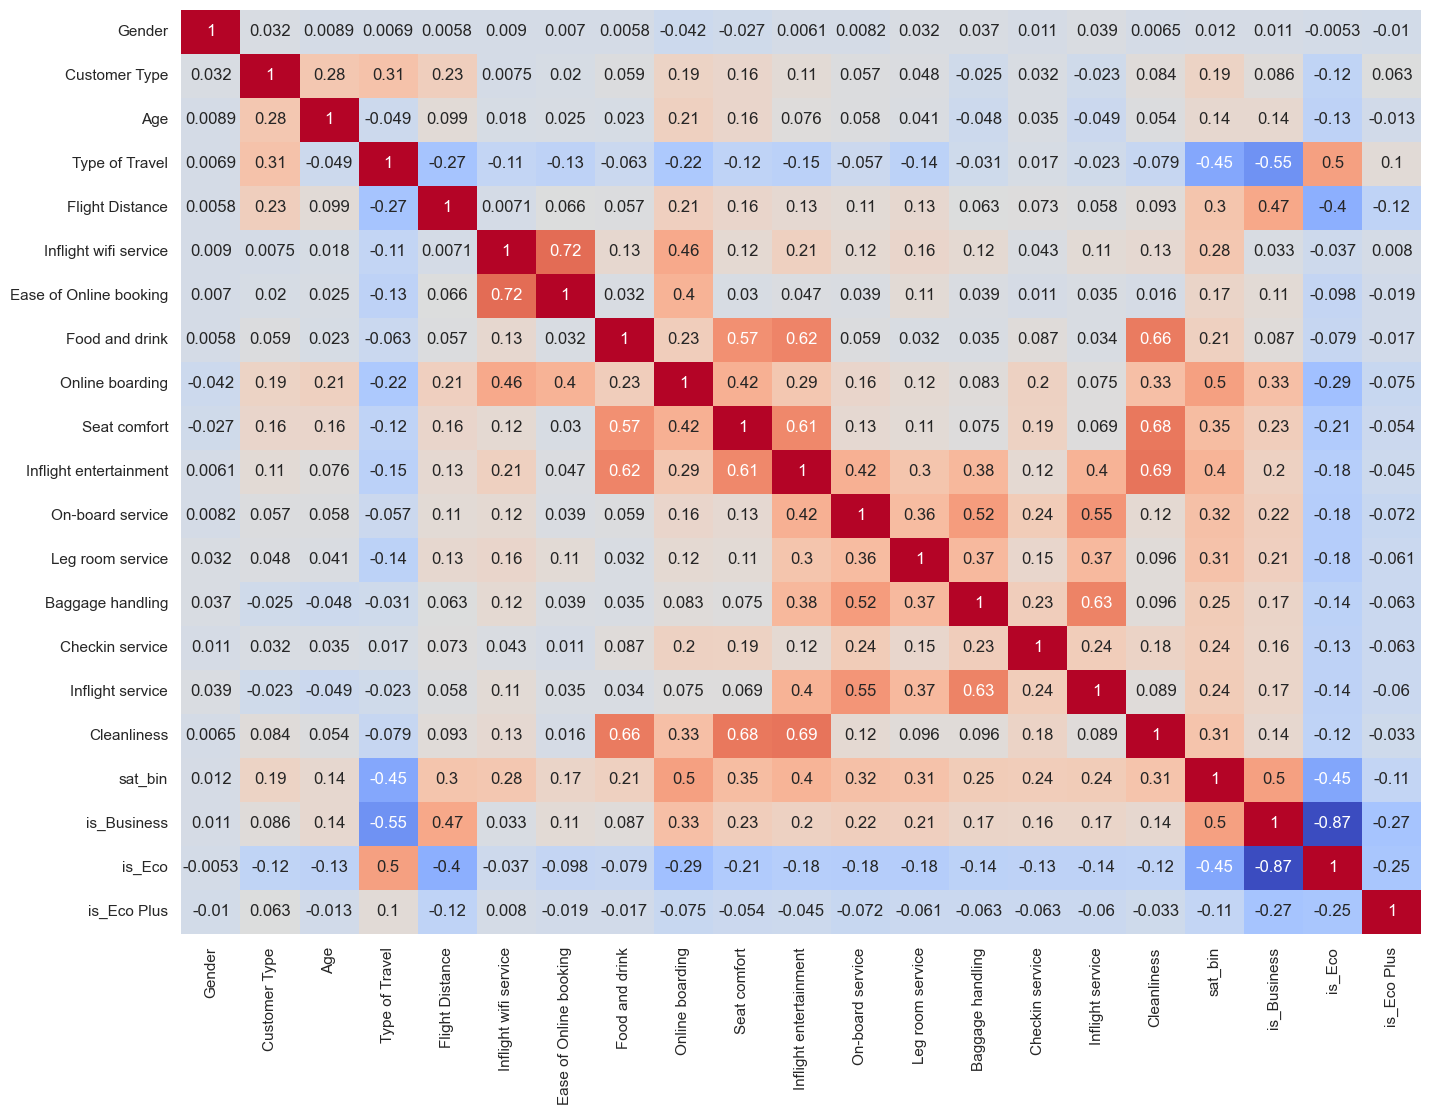

In [47]:
plt.figure(figsize=(16,12))
sns.heatmap(train_df_preproc.corr(), annot=True, cmap='coolwarm', cbar=False)

In [48]:
train_df_preproc.drop(['Gender'], axis=1, inplace=True)

In [49]:
test_df_preproc = test_df.copy(deep=True)
test_df_preproc['sat_bin'] = test_df_preproc['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
test_df_preproc['Customer Type'] = test_df_preproc['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
test_df_preproc['Type of Travel'] = test_df_preproc['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)
tr = ohe.transform(test_df_preproc[['Class']])
cols = [f'is_{cat}' for cat in ohe.categories_[0]]
ClassDF = pd.DataFrame(tr, columns=cols)
test_df_preproc = test_df_preproc.join(ClassDF)
test_df_preproc = test_df_preproc.drop(columns=['Gender', 'id', 'Class', 
                      'Departure/Arrival time convenient',
                      'Gate location',
                      'Departure Delay in Minutes',
                      'Arrival Delay in Minutes', 'satisfaction'])


In [50]:
train_df_preproc.columns == test_df_preproc.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [51]:
X_train = train_df_preproc.drop(['sat_bin'], axis=1)
y_train = train_df_preproc['sat_bin']
X_test = test_df_preproc.drop(['sat_bin'], axis=1)
y_test = test_df_preproc['sat_bin']

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
train_df_preproc.shape, test_df_preproc.shape

((103904, 20), (25976, 20))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from tqdm import tqdm

In [ ]:
models = {
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'params' : {
             'n_estimators' : [20, 50, 100, 200],
             'max_depth' : [2, 5, 10, 20],
             'min_samples_split' : [2, 5, 10]            
        }
    },
    
    'K-Neighbors Classifier' : {
        'model' : KNeighborsClassifier(),
        'params' : {
           'n_neighbors' : [3, 5, 7, 9],
           'weights' : ['uniform', 'distance'],
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']            
        }
    },
    
    'Adaptive Boosting Classifier' : {
        'model' : AdaBoostClassifier(),
        'params' : {
            'n_estimators' : [10, 25, 50, 100, 120, 150, 200]            
        }
    },
    
    'XGBClassifier' : {
        'model' : XGBClassifier(),
        'params' : {
            'n_estimators' : [2, 10, 25, 50, 100, 200],
            'max_depth' : [2,4,6,10]            
        }
    }
}

scores = []
modelsDF = pd.DataFrame(columns=['model', 'best_score', 'best_params'])
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for model_name, config in tqdm(models.items()):
    gs = GridSearchCV(config['model'], config['params'], cv=cv, verbose=True)
    gs.fit(X_train, y_train)
    scores.append({
            'model' : model_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

#modelsDF.sort_values(by='best_score', ascending=False).style.background_gradient(cmap='Greens')

  0%|          | 0/4 [00:00<?, ?it/s]

Fitting 5 folds for each of 48 candidates, totalling 240 fits


<h2>Random Forest Classifier</h2>

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
params = {
             'n_estimators' : [20, 50, 100, 200],
             'max_depth' : [2, 5, 10, 20],
             'min_samples_split' : [2, 5, 10]
         }
gs = GridSearchCV(RandomForestClassifier(), params, cv=cv, verbose=True)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

<h2>K-Neighbors Classifier</h2>

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
params={
           'n_neighbors' : [3, 5, 7, 9],
           'weights' : ['uniform', 'distance'],
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
       }
gs = GridSearchCV(KNeighborsClassifier(), params, cv=cv, verbose=True)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

<h2>Adaptive Boosting Classifier</h2>

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
params = {
    'n_estimators' : [10, 25, 50, 100, 120, 150, 200]
}
gs = GridSearchCV(AdaBoostClassifier(), params, cv=cv, verbose=True)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

<h2>XGBClassifier</h2>

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
params = {
    'n_estimators' : [2, 10, 25, 50, 100, 200],
    'max_depth' : [2,4,6,10]
}
gs = GridSearchCV(XGBClassifier(), params, cv=cv, verbose=True)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

<h2>Формирование итогового DataFrame с результатами полученных моделей</h2>
(Знаю, что это нужно обернуть в цикл и не заполнять руками)

In [ ]:
res = pd.DataFrame(columns=['model', 'best_score', 'best_params'])
res = res.append({'model' : 'RandonForestClassifier', 'best_score' : 0.9636031180829564, 'best_params' : "{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}"}, ignore_index=True)
res = res.append({'model' : 'KNeighborsClassifier', 'best_score' : 0.8109710326243865, 'best_params' : "{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}"}, ignore_index=True)
res = res.append({'model' : 'AdaBoostClassifier', 'best_score' : 0.9289192570493696, 'best_params' : "{'n_estimators': 120}"}, ignore_index=True)
res = res.append({'model' : 'XGBClassifier', 'best_score' : 0.9632374169954769, 'best_params' : "{'max_depth': 6, 'n_estimators': 100}"}, ignore_index=True)
res.sort_values(by='best_score', ascending=False).style.background_gradient(cmap='Greens')

<h2>Промежуточный итог</h2>


Наилучший результат показал RandomForest, поэтому обучим модель на всей обучающей выборке и проверим на тестовой выборке.

In [ ]:
RFC = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200)
RFC.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, RFC.predict(X_test)), annot=True, fmt='g', cmap='coolwarm')
plt.ylabel('Истинные значения')
plt.xlabel('Прогноз модели')
plt.show()

In [ ]:
print(classification_report(y_test, RFC.predict(X_test)))